In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityamiskin","key":"8e123aaa6106fc726a3abad2f16cd8ce"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 44.8MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.5MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 74.0MB/s]
 82% 5.00M/6.09M [00:00<00:00, 38.4MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from zipfile import ZipFile
file_name='/content/test.csv.zip'
with ZipFile(file_name,'r') as zp:
  zp.extractall()
file_name='/content/train.csv.zip'
with ZipFile(file_name,'r') as zp:
  zp.extractall()
print("done")

done


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train = train_df['label']
X_train = train_df.drop('label',axis=1).copy()
X_test = test_df

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)

In [ ]:
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)
datagen.fit(X_train)

In [ ]:
model = keras.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(256,activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=86),
                              validation_data=(X_val,Y_val),
                              verbose=1,
                              epochs=30,
                              steps_per_epoch=86)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
86/86 [==============================] - 5s 30ms/step - loss: 1.1720 - accuracy: 0.6069 - val_loss: 0.2237 - val_accuracy: 0.9379
Epoch 2/30
86/86 [==============================] - 2s 27ms/step - loss: 0.4606 - accuracy: 0.8544 - val_loss: 0.1381 - val_accuracy: 0.9574
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.3176 - accuracy: 0.9043 - val_loss: 0.1115 - val_accuracy: 0.9658
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.2755 - accuracy: 0.9135 - val_loss: 0.0923 - val_accuracy: 0.9719
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.2440 - accuracy: 0.9232 - val_loss: 0.0909 - val_accuracy: 0.9708
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.2150 - accuracy: 0.9347 - val_loss: 0.0788 - val_accuracy: 0.9752
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.1952 - accuracy: 0.9435 - val_loss: 0.0764 - val_accuracy: 0.9756
Epoch 8/30
86

In [ ]:
result = model.predict(X_test)
result = np.argmax(result,axis=1)
result = pd.Series(result,name="Label")

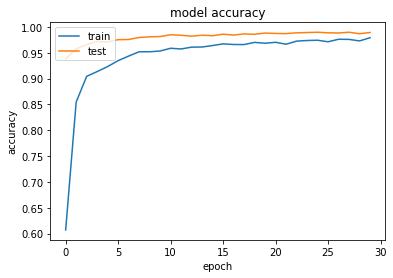

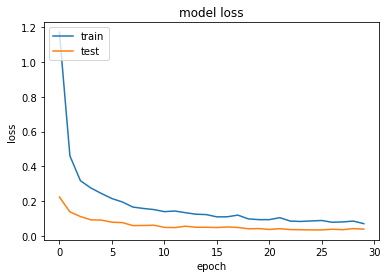

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()